In [32]:
# 📁 Setup Clean Paths (Works for GitHub too!)
from pathlib import Path
import os

# Project root = where the notebook is run from
PROJECT_ROOT = Path().resolve().parent

# Define folders
DATA_DIR = PROJECT_ROOT / "data"
MODELS_DIR = PROJECT_ROOT / "models"
OUTPUTS_DIR = PROJECT_ROOT / "outputs"

# Ensure folders exist
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(OUTPUTS_DIR, exist_ok=True)


✅ SHAP global plots saved.
✅ SHAP local waterfall plot saved.


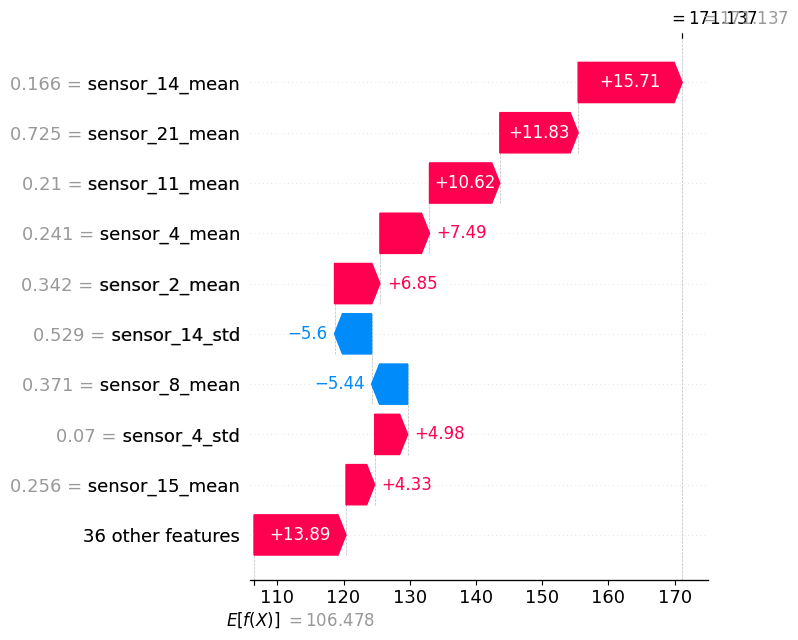

In [33]:
# ------------------------------------------
# Step 1: Load Model + Data
# ------------------------------------------
import pandas as pd
import joblib


# 🔍 What: Load trained model + processed data
# 💡 Why: We want to explain RUL predictions on test data
# 🛠️ How: Load from relative paths

# Load model and test set
model = joblib.load(MODELS_DIR / "xgb_rul_model.pkl")
test_df = pd.read_csv(DATA_DIR / "processed_sensor_data.csv")


# Ensure same test split
from sklearn.model_selection import train_test_split
units = test_df['unit'].unique()
_, test_units = train_test_split(units, test_size=0.2, random_state=42)
test_df = test_df[test_df['unit'].isin(test_units)]

# Split again
target = 'RUL'
exclude_cols = ['unit', 'cycle', 'max_cycle', 'RUL']
features = [col for col in test_df.columns if col not in exclude_cols]
X_test = test_df[features]

# ------------------------------------------
# Step 2: Initialize SHAP Explainer
# ------------------------------------------
# 🔍 What: SHAP Explainer
# 💡 Why: Understand what features influence RUL predictions
# 🛠️ How: Use TreeExplainer for XGBoost

import shap
import matplotlib.pyplot as plt  # Make sure this is imported if not already

# Create TreeExplainer (XGBoost is tree-based)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Optional: save for later use
# joblib.dump(shap_values, "outputs/shap_values.pkl")

# ------------------------------------------
# Step 3: Global Explanation – SHAP Summary Plots
# ------------------------------------------

# Beeswarm Plot
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()

# Save
os.makedirs("outputs", exist_ok=True)
plt.savefig(OUTPUTS_DIR / "shap_summary_beeswarm.png", dpi=300)
plt.clf()

# Bar Plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("outputs/shap_summary_bar.png", dpi=300)
plt.clf()

print("✅ SHAP global plots saved.")

# ------------------------------------------------
# Step 4: Local Explanation (Waterfall Plot)
# ------------------------------------------------

# 🔍 What: Explain a single prediction
# 💡 Why: Show how each feature affects this specific prediction
# 🛠️ How: SHAP waterfall plot

row_to_explain = 10
shap.plots.waterfall(shap_values[row_to_explain], show=False)
plt.tight_layout()
plt.savefig(f"outputs/shap_waterfall_row{row_to_explain}.png", dpi=300)
plt.clf()

print("✅ SHAP local waterfall plot saved.")


# ------------------------------------------
# Step 4: Local Explanation – Individual Engine
# ------------------------------------------

# Pick one row to explain
row_to_explain = 10
shap.plots.waterfall(shap_values[row_to_explain])

